# House Prices
#### Ryan Peralta, Jonathan Wang, Yilliang Wu
#### CS 4661
#### Fall 2019
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview



In [140]:
# Importing numpy and pandas and other modules
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

#### Code that will help with graphing results later on

In [141]:
#Code for best fit line is found here:
#https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b


### Reading the csv into a dataframe

In [142]:
#Reading the csv downloaded from Kaggle into a dataframe
houses_df = pd.read_csv("House_Prices.csv")

#Combined the seperated csv from kaggle into one csv for better testing.
houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### Here are some graphs that help users visualize the information we can gain from looking into each feature of the given data set.

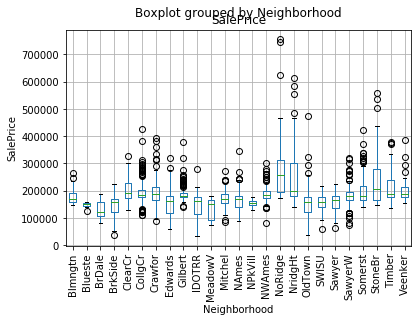

In [143]:
#to check the different house prices in different neighborhood
houses_df.boxplot(column='SalePrice', by='Neighborhood', whis=1.5,)
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
xt = plt.xticks(rotation=90)
plt.show()

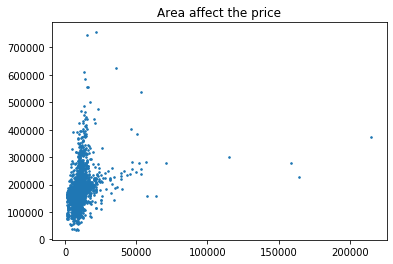

In [144]:
#how area affect the price
house_area= houses_df['LotArea']
house_price=houses_df['SalePrice']
plt.scatter(house_area,house_price,s=2.5)
plt.title("Area affect the price")
plt.show()

## 1a.) Linear Regression with select features
### Initial run with only 10 selected features
Establish a baseline for the project.
Every model we use after this should have a lower RMSE.

In [145]:
# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
X.head()

,LotArea,Neighborhood,BldgType,HouseStyle,YearBuilt,FullBath,YearRemodAdd,Foundation,SaleType,SaleCondition
0,8450,CollgCr,1Fam,2Story,2003,2,2003,PConc,WD,Normal
1,9600,Veenker,1Fam,1Story,1976,2,1976,CBlock,WD,Normal
2,11250,CollgCr,1Fam,2Story,2001,2,2002,PConc,WD,Normal
3,9550,Crawfor,1Fam,2Story,1915,1,1970,BrkTil,WD,Abnorml
4,14260,NoRidge,1Fam,2Story,2000,2,2000,PConc,WD,Normal


### Use label encoding to convert the string values into numbers

In [146]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition'])  
X.head()


,LotArea,Neighborhood,BldgType,HouseStyle,YearBuilt,FullBath,YearRemodAdd,Foundation,SaleType,SaleCondition
0,8450,5,0,5,2003,2,2003,2,8,4
1,9600,24,0,2,1976,2,1976,1,8,4
2,11250,5,0,5,2001,2,2002,2,8,4
3,9550,6,0,5,1915,1,1970,0,8,0
4,14260,15,0,5,2000,2,2000,2,8,4


### Splitting the Dataset into testing and training

In [147]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [148]:
linear_reg_houses = LinearRegression()
# fitting the model to the training data:
linear_reg_houses.fit(X_train, y_train)

# printing Theta0 using attribute "intercept_":
print(linear_reg_houses.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(linear_reg_houses.coef_)

-1070994.724813176
[ 1.58850512e+00  7.62004931e+02 -6.26278101e+03  8.25112801e+02
  3.31556307e+02  2.67069687e+04  2.72103173e+02  5.09823459e+02
 -2.47888906e+03  2.22912976e+03]


In [149]:
# make predictions on the testing set
y_prediction = linear_reg_houses.predict(X_test)

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

49367.798232765104


### RMSE = 49367.79
This is the baseling RMSE that we are going to be using.
The goal for the other techniques we are going to use is to lower the RMSE and see which model is the best.

## 1b.) Linear Regression with OneHot encoding
This is going to build off of the last model, but after using label encoding, we are going to use onehot encoding as well.

In [150]:
#Reading the csv downloaded from Kaggle into a dataframe
houses_df = pd.read_csv("House_Prices.csv")

#Combined the seperated csv from kaggle into one csv for better testing.

# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition'])  

In [151]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [1,2,3,7,8,9])
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,8450.0,2003.0,2.0,2003.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9600.0,1976.0,2.0,1976.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,11250.0,2001.0,2.0,2002.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,9550.0,1915.0,1.0,1970.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,14260.0,2000.0,2.0,2000.0


In [152]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

linear_reg_houses = LinearRegression()
# fitting the model to the training data:
linear_reg_houses.fit(X_train, y_train)

# printing Theta0 using attribute "intercept_":
print(linear_reg_houses.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(linear_reg_houses.coef_)

# make predictions on the testing set
y_prediction = linear_reg_houses.predict(X_test)

-723209.3045479711
[ 5.76978843e+03  1.48612316e+04  6.67901814e+03 -2.11674828e+04
 -9.19883461e+03 -1.21089243e+04  1.16911804e+04 -2.03946504e+04
 -2.85938839e+04 -1.70502325e+04 -2.91802044e+02 -1.59572566e+04
 -7.77807022e+03  7.79460004e+03 -8.33449824e+03  6.51066284e+04
  3.46210184e+04 -8.27714678e+03 -1.20343175e+04 -1.53557087e+04
 -1.28691429e+04 -6.11628023e+03  4.78817088e+04 -1.56069019e+04
  1.67299595e+04  2.01962603e+04  7.05231847e+03  6.84198709e+03
 -2.04483319e+04 -1.36422340e+04  1.34326685e+03 -2.63589030e+04
 -7.39987024e+03  1.74194607e+04  2.26235530e+04  3.38799904e+03
 -7.00301543e+03 -4.01249098e+03 -5.40640926e+02 -6.93632576e+02
  3.94044900e+03 -1.96724485e+04  1.29856438e+04  3.98062929e+03
 -1.83040046e+04  1.25181796e+02  3.41722659e+04 -8.92301954e+03
  1.78071819e+04 -2.92639633e+04  1.39526189e+04  3.84062476e+03
 -2.44126194e+04  1.10057336e+04 -5.20585507e+03  1.19749636e+04
  1.85882584e+04 -2.36475573e+03 -9.34540419e+02 -2.20580708e+04
  1.47

In [153]:
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

47787.080436974284


### RMSE = 47786.45
This is the new lowest RMSE.
One hot encoding on the previous model allowed us to get a lower value.

We should look into using label and one hot encoding for the other regression techniques we are going to use.

## 1c.) Linear Regression and cross validation
Continue using one hot encoding but now use cross validation to get a more accuracte RMSE

In [154]:
#Reading the csv downloaded from Kaggle into a dataframe
houses_df = pd.read_csv("House_Prices.csv")

#Combined the seperated csv from kaggle into one csv for better testing.

# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition'])  

In [155]:
# function cross_val_score performs Cross Validation:
linear_reg_houses = LinearRegression()
accuracy_list_lr = cross_val_score(linear_reg_houses, X, y, cv=10, scoring='neg_mean_squared_error')

In [156]:
def List_Average(x): 
    return sum(x) / len(x) 

rmse_list = []
for l in accuracy_list_lr:
    x = np.sqrt(-1* l)
    #print(x)
    rmse_list.append(x)
    

print("Linear Regression:                   ", List_Average(rmse_list))

Linear Regression:                    46602.33014125868


### RMSE = 46602.33
This is the new lowest RMSE.
By using cross validation, we were able to lower the RMSE from part 1b


####  We are now going to go back and run cross validaton on 1a to double check that 1c is supperior.

In [157]:
# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition'])  

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [1,2,3,7,8,9])
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)

# function cross_val_score performs Cross Validation:
linear_reg_houses = LinearRegression()
accuracy_list_lr_le = cross_val_score(linear_reg_houses, X, y, cv=10, scoring='neg_mean_squared_error')

rmse_list_le = []
for l in accuracy_list_lr_le:
    x = np.sqrt(-1* l)
    #print(x)
    rmse_list_le.append(x)
    


In [158]:
print("Linear Regression(One Hot Encoding Only):                   ", List_Average(rmse_list_le))

Linear Regression(One Hot Encoding Only):                    46753.48470209217


### Linear Regression with Label Encoding and One Hot Encoding is still the best
Linear Regression with One Hot Encoding Only has an RMSE of 46753.48

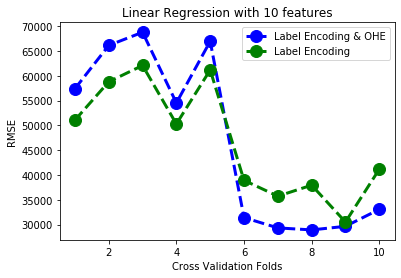

In [159]:
x_values = range(1, len(rmse_list)+1)
data_points1 = rmse_list 
data_points2 = rmse_list_le
line1, = plt.plot(x_values, data_points1,color='blue', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12, label='Label Encoding & OHE')
line2, = plt.plot(x_values, data_points2,color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='green', markersize=12, label='Label Encoding')

plt.legend(handles=[line1, line2])

# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('Linear Regression with 10 features')
plt.show()

## 1d.) Linear Regression with all features
We are now going to use linear regression with all of the features

### Here we are going through the data set and checking which features need to be label encoded.

In [160]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            
            
print(numeric_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [161]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

string_features = diff(all_features, numeric_features)
#print(string_features)

### Now that we have a list of the features that contain strings, we can use label encoding on the correct features.

In [162]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()

In [163]:
label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#X.head()

In [164]:
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)

In [165]:
linear_reg_houses = LinearRegression()
accuracy_list_lr_all = cross_val_score(linear_reg_houses, X, y, cv=10, scoring='neg_mean_squared_error')

In [166]:
# function cross_val_score performs Cross Validation:


rmse_list_lr_all = []
for l in accuracy_list_lr_all:
    x = np.sqrt(-1* l)
    rmse_list_lr_all.append(x)
    
print("Linear Regression(All Features - Label Encoding):                   ", List_Average(rmse_list_lr_all))

Linear Regression(All Features - Label Encoding):                    45200.436060971246


### RMSE = 45200.43
This is the new lowest RMSE.

By using information from all features and sanitizing it, it allowed us to get better results


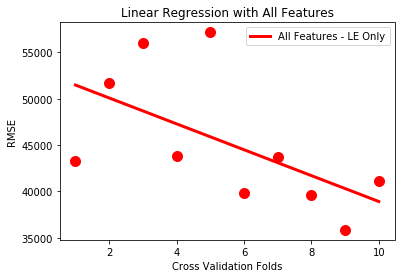

In [170]:
x_values = range(1, len(rmse_list_lr_all)+1)
data_points1 = rmse_list_lr_all 

# solution
a, b = best_fit(x_values, data_points1)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(x_values, data_points1,color='red',s=100)
yfit = [a + b * xi for xi in x_values]
line1, =plt.plot(x_values, yfit,linewidth = 3,color='red', markerfacecolor='red', markersize=12, label='All Features - LE Only')
#line1, = plt.plot(x_values, data_points1,color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12, label='All Features - LE Only')
plt.legend(handles=[line1])

# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('Linear Regression with All Features')
plt.show()

## 2.) Lasso Regression
https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b



## 2a.) LE on All Features

In [171]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]
#print(all_features)


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            

In [172]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()


In [173]:

label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)

In [174]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
accuracy_list_lasso = cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_lasso = []
for l in accuracy_list_lasso:
    x = np.sqrt(-1* l)
    rmse_lasso.append(x)
    
print("Laso Regression(All Features - Label Encoding):                   ", List_Average(rmse_lasso))

Laso Regression(All Features - Label Encoding):                    45198.62388350516


### RMSE = 45198.62
We will now see if we can lower the RMSE by using OHE.

## 2b.) LE and OHE on All Features

In [175]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]
#print(all_features)


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()



label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)

In [176]:
#One Hot Encoding is broken!
from sklearn.preprocessing import OneHotEncoder
string_indexs_minus1 = []
for i in string_indexs:
    string_indexs_minus1.append(i -1)

#print(string_indexs_minus1)   
onehotencoder = OneHotEncoder(categorical_features = string_indexs_minus1)
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)
X.head()




from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
accuracy_list_lasso_ohe = cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_lasso_ohe = []
for l in accuracy_list_lasso_ohe:
    x = np.sqrt(-1* l)
    rmse_lasso_ohe.append(x)
    
print("Laso Regression(All Features - Label Encoding & OHE):                   ", List_Average(rmse_lasso_ohe))

Laso Regression(All Features - Label Encoding & OHE):                    48688.091095476455


### RMSE = 48688.09
The RMSE increased dramtically when using OHE.

It might be because the number of features increases so much that it is not as effective.

## 2c.)  LE & DR on All Features and LE, OHE, & DR on All Features

In [177]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]
#print(all_features)


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)


In [178]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()
label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)

#X.head()

In [179]:
#One Hot Encoding is broken!
from sklearn.preprocessing import OneHotEncoder
string_indexs_minus1 = []
for i in string_indexs:
    string_indexs_minus1.append(i -1)


onehotencoder = OneHotEncoder(categorical_features = string_indexs_minus1)
X_onehot = onehotencoder.fit_transform(X).toarray()
X2 = pd.DataFrame(X_onehot)
#X2.head()

In [180]:
from  sklearn.decomposition import PCA
n = 10
my_pca = PCA(n_components=n)
X = my_pca.fit_transform(X)
X2 = my_pca.fit_transform(X2)


In [181]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
accuracy_list_lasso_ohe_dec = cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error')
accuracy_list_lasso_dec = cross_val_score(lasso, X2, y, cv=10, scoring='neg_mean_squared_error')

# function cross_val_score performs Cross Validation:


rmse_lasso_ohe_dec = []
rmse_lasso_dec = []
for l in accuracy_list_lasso_ohe_dec:
    x = np.sqrt(-1* l)
    rmse_lasso_ohe_dec.append(x)

for l in accuracy_list_lasso_dec:
    x = np.sqrt(-1* l)
    rmse_lasso_dec.append(x)

print("Lasso Regression(All Features - Label Encoding & OHE. Decompressed):          ", List_Average(rmse_lasso_ohe_dec))   
print("Lasso Regression(All Features - Label Encoding. Decompressed):          ", List_Average(rmse_lasso_dec))

Lasso Regression(All Features - Label Encoding & OHE. Decompressed):           44689.69871685545
Lasso Regression(All Features - Label Encoding. Decompressed):           44689.69866810303


## (LE, OHE, & DEC)RMSE = 44689.6987
## (LE & DEC)RMSE = 44689.6986
Both values are extremely similar. 

The is only a .0001 difference

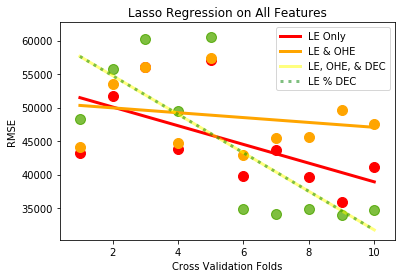

In [182]:
data_points1 =rmse_lasso
data_points2 =rmse_lasso_ohe
data_points3 =rmse_lasso_ohe_dec
data_points4 =rmse_lasso_dec

x_values = range(1, len(rmse_lasso)+1)

# solution
a, b = best_fit(x_values, data_points1)
c, d = best_fit(x_values, data_points2)
e, f = best_fit(x_values, data_points3)
g, h = best_fit(x_values, data_points4)


# plot points and fit line
plt.scatter(x_values, data_points1,color='red',s=100)
yfit = [a + b * xi for xi in x_values]
line1, =plt.plot(x_values, yfit,linewidth = 3,color='red', markerfacecolor='red', markersize=12, label='LE Only')

plt.scatter(x_values, data_points2,color='orange',s=100)
yfit2 = [c + d * xi for xi in x_values]
line2, =plt.plot(x_values, yfit2,linewidth = 3,color='orange', markerfacecolor='orange', markersize=12, label='LE & OHE')

plt.scatter(x_values, data_points3,color='yellow',s=100, alpha=.5)
yfit3 = [e + f * xi for xi in x_values]
line3, =plt.plot(x_values, yfit3,linestyle='-', alpha=.5,linewidth = 3,color='yellow', markerfacecolor='yellow', markersize=12, label='LE, OHE, & DEC')

plt.scatter(x_values, data_points4,color='green',s=100, alpha=.5)
yfit4 = [g + h * xi for xi in x_values]
line4, =plt.plot(x_values, yfit4,linestyle=':', alpha=.5,linewidth = 3,color='green', markerfacecolor='green', markersize=12, label='LE % DEC')


#line1, = plt.plot(x_values, data_points1,color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12, label='All Features - LE Only')
plt.legend(handles=[line1,line2,line3,line4])

# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('Lasso Regression on All Features')
plt.show()

## Lasso Regression with feature decomposition has the lowest RMSE.
Both version using feature decomposition had similar results.

RMSE = 44689.69


## 3.) SVR (Support Vector Regression)
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

## 3a.) SVR - All Features: LE Only

In [183]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            

In [184]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()


label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)

In [185]:
from sklearn.svm import SVR
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
accuracy_list_svr = cross_val_score(svr, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_list_svr = []
for l in accuracy_list_svr:
    x = np.sqrt(-1* l)
    rmse_list_svr.append(x)
    
print("SVR Regression(All Features - Label Encoding):                   ", List_Average(rmse_list_svr))

SVR Regression(All Features - Label Encoding):                    47961.02959705294


### RMSE = 47961.02
SVR Regression on all features with LE give us a Higher RMSE in comparison to other models.
It also takes a signifiantly longer amount of time to run as well.

## 3b.) SVR - All Features: LE & OHE

In [186]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            

In [187]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()


label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)


#One Hot Encoding is broken!
from sklearn.preprocessing import OneHotEncoder
string_indexs_minus1 = []
for i in string_indexs:
    string_indexs_minus1.append(i -1)

#print(string_indexs_minus1)   
onehotencoder = OneHotEncoder(categorical_features = string_indexs_minus1)
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)


In [188]:
from sklearn.svm import SVR
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
accuracy_list_svr_ohe = cross_val_score(svr, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_list_svr_ohe = []
for l in accuracy_list_svr_ohe:
    x = np.sqrt(-1* l)
    rmse_list_svr_ohe.append(x)
    
print("SVR Regression(All Features - Label Encoding & One Hot Encoding:                   ", List_Average(rmse_list_svr_ohe))

SVR Regression(All Features - Label Encoding & One Hot Encoding:                    47962.10949893759


### RMSE = 47962.10
SVR Regression on all features with LE and OHE give us a Higher RMSE than without OHE.
Next we will try SVR with feature decompisition.

## 3c.) SVR - All Features: LE & OHE & DEC

In [189]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            

In [190]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()


label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)


#One Hot Encoding is broken!
from sklearn.preprocessing import OneHotEncoder
string_indexs_minus1 = []
for i in string_indexs:
    string_indexs_minus1.append(i -1)

#print(string_indexs_minus1)   
onehotencoder = OneHotEncoder(categorical_features = string_indexs_minus1)
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)


from  sklearn.decomposition import PCA
n = 10
my_pca = PCA(n_components=n)
X = my_pca.fit_transform(X)



from sklearn.svm import SVR
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
accuracy_list_svr_dec = cross_val_score(svr, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_list_svr_dec = []
for l in accuracy_list_svr_dec:
    x = np.sqrt(-1* l)
    rmse_list_svr_dec.append(x)
    
print("SVR Regression(All Features - LE & OHE & DEC):                   ", List_Average(rmse_list_svr_dec))



SVR Regression(All Features - LE & OHE & DEC):                    47922.98840256698


### RMSE = 47922.98
Altough this is the lowest RMSE for SVR, other models provide better overall results.

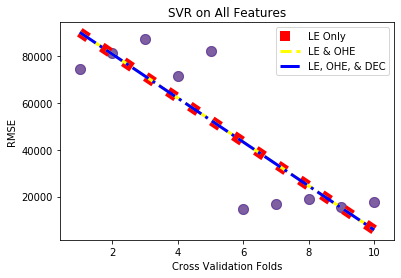

In [191]:
data_points1 =rmse_list_svr
data_points2 =rmse_list_svr_ohe
data_points3 =rmse_list_svr_dec


x_values = range(1, len(rmse_list_rr_10)+1)

# solution
a, b = best_fit(x_values, data_points1)
c, d = best_fit(x_values, data_points2)
e, f = best_fit(x_values, data_points3)
#g, h = best_fit(x_values, data_points4)
#i, j = best_fit(x_values, data_points5)


# plot points and fit line
plt.scatter(x_values, data_points1,color='red',s=100, alpha=.5)
yfit = [a + b * xi for xi in x_values]
line1, =plt.plot(x_values, yfit,linestyle=':',linewidth = 10,color='red', markerfacecolor='red', markersize=12, label='LE Only')

plt.scatter(x_values, data_points2,color='yellow',s=100, alpha=.5)
yfit2 = [c + d * xi for xi in x_values]
line2, =plt.plot(x_values, yfit2,linestyle='--',linewidth = 3,color='yellow', markerfacecolor='yellow', markersize=12, label='LE & OHE')


plt.scatter(x_values, data_points3,color='blue',s=100, alpha=.5)
yfit3 = [e + f * xi for xi in x_values]
line3, =plt.plot(x_values, yfit3,linestyle='-.',linewidth = 3,color='blue', markerfacecolor='blue', markersize=12, label='LE, OHE, & DEC')



#line1, = plt.plot(x_values, data_points1,color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12, label='All Features - LE Only')
plt.legend(handles=[line1,line2,line3])

# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('SVR on All Features')
plt.show()

## All of the SVR attempts were extremely similar.
Since all of the values were extremely similar, then lines and dots are overlapping on the graph. 

## 4.) Random Forest Regression
We are going to apply a RFR model and see what RMSE values we obtain.

We are going to use all features and decomposition them since when we do, we obtain the best results.


## 4a.) LE & DEC on All features

## 4b.) LE , OHE, & DEC on All features

In [192]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            

In [193]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()


label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)


#One Hot Encoding is broken!
from sklearn.preprocessing import OneHotEncoder
string_indexs_minus1 = []
for i in string_indexs:
    string_indexs_minus1.append(i -1)

#print(string_indexs_minus1)   
onehotencoder = OneHotEncoder(categorical_features = string_indexs_minus1)
X_onehot = onehotencoder.fit_transform(X).toarray()
X2 = pd.DataFrame(X_onehot)


from  sklearn.decomposition import PCA
n = 10
my_pca = PCA(n_components=n)
X = my_pca.fit_transform(X)
X2 = my_pca.fit_transform(X2)







from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0,n_estimators=100)

accuracy_list_rf_ohe_dec = cross_val_score(regr, X, y, cv=10, scoring='neg_mean_squared_error')
accuracy_list_rf_dec = cross_val_score(regr, X2, y, cv=10, scoring='neg_mean_squared_error')

# function cross_val_score performs Cross Validation:


rmse_rf_ohe_dec = []
rmse_rf_dec = []
for l in accuracy_list_rf_ohe_dec:
    x = np.sqrt(-1* l)
    rmse_rf_ohe_dec.append(x)

for l in accuracy_list_rf_dec:
    x = np.sqrt(-1* l)
    rmse_rf_dec.append(x)

print("Random Forest Regression(All Features - Label Encoding & OHE. Decompressed):          ", List_Average(rmse_rf_ohe_dec))   
print("Random Forest Regression(All Features - Label Encoding. Decompressed):          ", List_Average(rmse_rf_dec))

Random Forest Regression(All Features - Label Encoding & OHE. Decompressed):           45412.165859726025
Random Forest Regression(All Features - Label Encoding. Decompressed):           45411.54520396483


## (LE, OHE, & DEC)RMSE = 45412.16
## (LE & DEC)RMSE = 45411.54
Both values are extremely similar. 

The is only a .6 difference

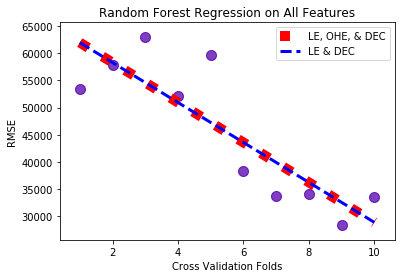

In [194]:
data_points1 =rmse_rf_ohe_dec
data_points2 =rmse_rf_dec


x_values = range(1, len(rmse_rf_dec)+1)

# solution
a, b = best_fit(x_values, data_points1)
c, d = best_fit(x_values, data_points2)


# plot points and fit line
plt.scatter(x_values, data_points1,color='red',s=100, alpha=.5)
yfit = [a + b * xi for xi in x_values]
line1, =plt.plot(x_values, yfit,linestyle=':',linewidth = 10,color='red', markerfacecolor='red', markersize=12, label='LE, OHE, & DEC')

plt.scatter(x_values, data_points2,color='blue',s=100, alpha=.5)
yfit2 = [c + d * xi for xi in x_values]
line2, =plt.plot(x_values, yfit2,linestyle='--',linewidth = 3,color='blue', markerfacecolor='blue', markersize=12, label='LE & DEC')

#line1, = plt.plot(x_values, data_points1,color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12, label='All Features - LE Only')
plt.legend(handles=[line1,line2])

# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('Random Forest Regression on All Features')
plt.show()

## 5.) Ridge Regression 

## 5a.) 10 features, Label Encoding

In [195]:
from sklearn.linear_model import Ridge
# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition']) 


ridge_r = Ridge(alpha=1.0)
accuracy_list_rr_10 = cross_val_score(ridge_r, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_list_rr_10 = []
for l in accuracy_list_rr_10:
    x = np.sqrt(-1* l)
    rmse_list_rr_10.append(x)
    
print("Ridge Regression(10 Features - Label Encoding):                   ", List_Average(rmse_list_rr_10))

Ridge Regression(10 Features - Label Encoding):                    46600.20485218898


### Ridge Regression on 10 features give us similar RMSE to Linear Regression with 10 features
RMSE = 46600.20, RMSE of Linear Regression with 10 features is 46602.33

Extremely similar.

## 5b.) Ridge Regression (10 features, Label Encoding and One Hot Encoding)

In [196]:
from sklearn.linear_model import Ridge
# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition']) 

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [1,2,3,7,8,9])
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)

ridge_r = Ridge(alpha=1.0)
accuracy_list_rr_10_ohe = cross_val_score(ridge_r, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_list_rr_10_ohe = []
for l in accuracy_list_rr_10_ohe:
    x = np.sqrt(-1* l)
    rmse_list_rr_10_ohe.append(x)
    
print("Ridge Regression(10 Features - Label Encoding & OHE):                   ", List_Average(rmse_list_rr_10_ohe))

Ridge Regression(10 Features - Label Encoding & OHE):                    46652.33830994106


### Ridge Regression on 10 features with OHE give us a Higher RMSE than without it.
RMSE = 46652.33, RMSE of Ridge Regression with no OHE is 46600.20

## 5c.) Ridge Regression on all features with LE
We are now going to try and get a lower RMSE by including all of the features in the data set.

In [197]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]
#print(all_features)


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            
            
print(numeric_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [198]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()


In [199]:

label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)

In [200]:

ridge_r = Ridge(alpha=1.0)
accuracy_list_rr_all = cross_val_score(ridge_r, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_list_rr_all = []
for l in accuracy_list_rr_all:
    x = np.sqrt(-1* l)
    rmse_list_rr_all.append(x)
    
print("Ridge Regression(All Features - Label Encoding):                   ", List_Average(rmse_list_rr_all))

Ridge Regression(All Features - Label Encoding):                    45063.014333470725


### RMSE = 45063.01
This is the new lowest RMSE.
By using cross validation, we were able to lower the RMSE from part 2a.

## 5d.) Ridge Regression on all features with LE and OHE

In [201]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]
#print(all_features)


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            
            
print(numeric_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [202]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()
label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)

In [203]:
#One Hot Encoding is broken!
from sklearn.preprocessing import OneHotEncoder
string_indexs_minus1 = []
for i in string_indexs:
    string_indexs_minus1.append(i -1)

print(string_indexs_minus1)   
onehotencoder = OneHotEncoder(categorical_features = string_indexs_minus1)
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)
X.head()

[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 38, 39, 40, 41, 52, 54, 56, 57, 59, 62, 63, 64, 71, 72, 73, 77, 78]


,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,310
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [204]:

ridge_r = Ridge(alpha=1.0)
accuracy_list_rr_all_ohe = cross_val_score(ridge_r, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_list_rr_all_ohe = []
for l in accuracy_list_rr_all_ohe:
    x = np.sqrt(-1* l)
    rmse_list_rr_all_ohe.append(x)
    
print("Ridge Regression(All Features - Label Encoding & OHE):                   ", List_Average(rmse_list_rr_all_ohe))

Ridge Regression(All Features - Label Encoding & OHE):                    46695.71169724723


### RMSE = 46695.71
The RMSE is higher now in comparison to before using OHE.

It might be because of the total amount of features we have.

In the next step we are going to use Dimensionality Reduction to see if that lowers the RMSE.


## 5e.) Ridge Regression on all features with LE and OHE (With dimensionality reduction)

In [97]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]
#print(all_features)


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            
            
print(numeric_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [98]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()
label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)

#One Hot Encoding is broken!
from sklearn.preprocessing import OneHotEncoder
string_indexs_minus1 = []
for i in string_indexs:
    string_indexs_minus1.append(i -1)

print(string_indexs_minus1)   
onehotencoder = OneHotEncoder(categorical_features = string_indexs_minus1)
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)


C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 38, 39, 40, 41, 52, 54, 56, 57, 59, 62, 63, 64, 71, 72, 73, 77, 78]


C:\Users\rpera\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\rpera\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [99]:
from  sklearn.decomposition import PCA
n = 10
my_pca = PCA(n_components=n)
X = my_pca.fit_transform(X)


In [100]:

ridge_r = Ridge(alpha=1.0)
accuracy_list_rr_dec = cross_val_score(ridge_r, X, y, cv=10, scoring='neg_mean_squared_error')
#ridge_r = ridge_r.fit(X_train, y_train) 


# function cross_val_score performs Cross Validation:


rmse_list_rr_dec = []
for l in accuracy_list_rr_dec:
    x = np.sqrt(-1* l)
    rmse_list_rr_dec.append(x)
    
print("Ridge Regression(All Features - Label Encoding & OHE. Decompressed):          ", List_Average(rmse_list_rr_dec))

Ridge Regression(All Features - Label Encoding & OHE. Decompressed):           44689.69881137482


### RMSE = 44689.69
This is the new lowest RMSE.
By combining all of the features into 10, we get as much information as possible while not overcomplicating the model.

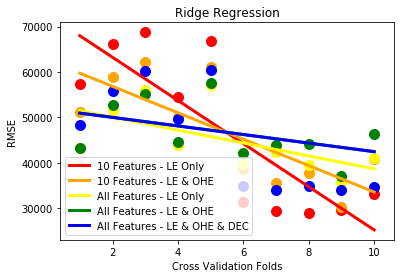

In [101]:
data_points1 =rmse_list_rr_10
data_points2 =rmse_list_rr_10_ohe
data_points3 =rmse_list_rr_all
data_points4 =rmse_list_rr_all_ohe
data_points5 =rmse_list_rr_dec

x_values = range(1, len(rmse_list_rr_10)+1)

# solution
a, b = best_fit(x_values, data_points1)
c, d = best_fit(x_values, data_points2)
e, f = best_fit(x_values, data_points3)
g, h = best_fit(x_values, data_points4)
i, j = best_fit(x_values, data_points5)


# plot points and fit line
plt.scatter(x_values, data_points1,color='red',s=100)
yfit = [a + b * xi for xi in x_values]
line1, =plt.plot(x_values, yfit,linewidth = 3,color='red', markerfacecolor='red', markersize=12, label='10 Features - LE Only')

plt.scatter(x_values, data_points2,color='orange',s=100)
yfit2 = [c + d * xi for xi in x_values]
line2, =plt.plot(x_values, yfit2,linewidth = 3,color='orange', markerfacecolor='orange', markersize=12, label='10 Features - LE & OHE')

plt.scatter(x_values, data_points3,color='yellow',s=100)
yfit3 = [e + f * xi for xi in x_values]
line3, =plt.plot(x_values, yfit3,linewidth = 3,color='yellow', markerfacecolor='yellow', markersize=12, label='All Features - LE Only')

plt.scatter(x_values, data_points4,color='green',s=100)
yfit4 = [g + h * xi for xi in x_values]
line4, =plt.plot(x_values, yfit4,linewidth = 3,color='green', markerfacecolor='green', markersize=12, label='All Features - LE & OHE')

plt.scatter(x_values, data_points5,color='blue',s=100)
yfit5 = [i + j * xi for xi in x_values]
line5, =plt.plot(x_values, yfit4,linewidth = 3,color='blue', markerfacecolor='blue', markersize=12, label='All Features - LE & OHE & DEC')


#line1, = plt.plot(x_values, data_points1,color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12, label='All Features - LE Only')
plt.legend(handles=[line1,line2,line3,line4,line5])

# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('Ridge Regression')
plt.show()

## 6.) Stacking Models
In this section we are going to try and combine some of the best models we have used so far, and see if they give us better results.


### **Need to instal mlxtend for this section to work**
pip install mlxtend 
run this command in your anaconda prompt and it will work

In [213]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0,n_estimators=100)
lasso = linear_model.Lasso(alpha=0.1)
lr = LinearRegression()
ridge_r = Ridge(alpha=1.0)
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)


In [214]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            

In [218]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()

label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)


#One Hot Encoding is broken!
from sklearn.preprocessing import OneHotEncoder
string_indexs_minus1 = []
for i in string_indexs:
    string_indexs_minus1.append(i -1)

#print(string_indexs_minus1)   
onehotencoder = OneHotEncoder(categorical_features = string_indexs_minus1)
X_onehot = onehotencoder.fit_transform(X).toarray()
X2 = pd.DataFrame(X_onehot)


from  sklearn.decomposition import PCA
n = 10
my_pca = PCA(n_components=n)
X = my_pca.fit_transform(X)
X2 = my_pca.fit_transform(X2)






stregr = StackingRegressor(regressors=[lr,lasso , ridge_r], meta_regressor=lr)
stregr2 = StackingRegressor(regressors=[svr, regr, lasso], meta_regressor=svr)
stregr3 = StackingRegressor(regressors=[ridge_r, regr, lasso, lr], meta_regressor=lasso)

accuracy_list_stack1_ohe = cross_val_score(stregr, X, y, cv=10, scoring='neg_mean_squared_error')
accuracy_list_stack1 = cross_val_score(stregr, X2, y, cv=10, scoring='neg_mean_squared_error')

accuracy_list_stack2_ohe = cross_val_score(stregr2, X, y, cv=10, scoring='neg_mean_squared_error')
accuracy_list_stack2 = cross_val_score(stregr2, X2, y, cv=10, scoring='neg_mean_squared_error')

accuracy_list_stack3_ohe = cross_val_score(stregr3, X, y, cv=10, scoring='neg_mean_squared_error')
accuracy_list_stack3 = cross_val_score(stregr3, X2, y, cv=10, scoring='neg_mean_squared_error')
# function cross_val_score performs Cross Validation:

rmse_stack1_ohe = []
rmse_stack1 = []
for l in accuracy_list_stack1_ohe:
    x = np.sqrt(-1* l)
    rmse_stack1_ohe.append(x)

for l in accuracy_list_stack1:
    x = np.sqrt(-1* l)
    rmse_stack1.append(x)
print("Stack 1 = Linear Regression, Lasso, and Ridge Regression")
print("Stack 1(All Features - Label Encoding & OHE. Decompressed):          ", List_Average(rmse_stack1_ohe))   
print("Stack 1(All Features - Label Encoding. Decompressed):          ", List_Average(rmse_stack1))

rmse_stack2_ohe = []
rmse_stack2 = []
for l in accuracy_list_stack2_ohe:
    x = np.sqrt(-1* l)
    rmse_stack2_ohe.append(x)

for l in accuracy_list_stack2:
    x = np.sqrt(-1* l)
    rmse_stack2.append(x)
print("Stack 2 = SVR, Random Forest, and Lasso")
print("Stack 2(All Features - Label Encoding & OHE. Decompressed):          ", List_Average(rmse_stack2_ohe))   
print("Stack 2(All Features - Label Encoding. Decompressed):          ", List_Average(rmse_stack2))

rmse_stack3_ohe = []
rmse_stack3 = []
for l in accuracy_list_stack3_ohe:
    x = np.sqrt(-1* l)
    rmse_stack3_ohe.append(x)

for l in accuracy_list_stack3:
    x = np.sqrt(-1* l)
    rmse_stack3.append(x)
print("Stack 3 = Ridge Regression, Random Forest, Lasso, and Linear")
print("Stack 3(All Features - Label Encoding & OHE. Decompressed):          ", List_Average(rmse_stack3_ohe))   
print("Stack 3(All Features - Label Encoding. Decompressed):          ", List_Average(rmse_stack3))

Stack 1 = Linear Regression, Lasso, and Ridge Regression: Meta=Linear
Stack 1(All Features - Label Encoding & OHE. Decompressed):           44689.69884759191
Stack 1(All Features - Label Encoding. Decompressed):           44689.69879975745
Stack 2 = Ridge Regression, Random Forest, and Lasso: Meta=Ridge
Stack 2(All Features - Label Encoding & OHE. Decompressed):           47846.93101723774
Stack 2(All Features - Label Encoding. Decompressed):           47846.924657818665
Stack 3 = Ridge Regression, Random Forest, Lasso, and Linear: Meta=Lasso
Stack 3(All Features - Label Encoding & OHE. Decompressed):           46770.145137421976
Stack 3(All Features - Label Encoding. Decompressed):           46769.87221436824


## Stack 1 with no OHE gave us the best results from the stacks.

RMSE = 44689.698

However, the RMSE for Stack 1 with OHE is only .001 worse. They are very similar.

Stack 1 = Linear Regression, Lasso, and Ridge Regression
Stack 2 = SVR, Random Forest, and Lasso
Stack 3 = Ridge Regression, Random Forest, Lasso, and Linear


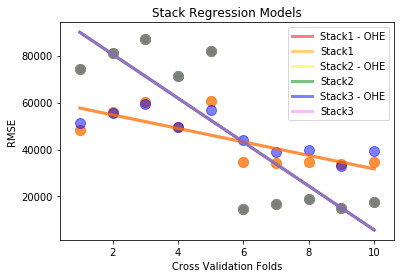

In [222]:
data_points1 =rmse_stack1_ohe
data_points2 =rmse_stack1
data_points3 =rmse_stack2_ohe
data_points4 =rmse_stack2
data_points5 =rmse_stack3_ohe
data_points6 =rmse_stack3

x_values = range(1, len(rmse_stack1_ohe)+1)

# solution
a, b = best_fit(x_values, data_points1)
c, d = best_fit(x_values, data_points2)
e, f = best_fit(x_values, data_points3)
g, h = best_fit(x_values, data_points4)
i, j = best_fit(x_values, data_points5)
k, l = best_fit(x_values, data_points6)


# plot points and fit line
plt.scatter(x_values, data_points1,color='red',s=100,alpha=.5)
yfit = [a + b * xi for xi in x_values]
line1, =plt.plot(x_values, yfit,linewidth = 3,color='red',alpha=.5, markerfacecolor='red', markersize=12, label='Stack1 - OHE')

plt.scatter(x_values, data_points2,color='orange',s=100,alpha=.5)
yfit2 = [c + d * xi for xi in x_values]
line2, =plt.plot(x_values, yfit2,linewidth = 3,color='orange',alpha=.5, markerfacecolor='orange', markersize=12, label='Stack1')

plt.scatter(x_values, data_points3,color='yellow',s=100,alpha=.5)
yfit3 = [e + f * xi for xi in x_values]
line3, =plt.plot(x_values, yfit3,linewidth = 3,color='yellow',alpha=.5, markerfacecolor='yellow', markersize=12, label='Stack2 - OHE')

plt.scatter(x_values, data_points4,color='green',s=100)
yfit4 = [g + h * xi for xi in x_values]
line4, =plt.plot(x_values, yfit4,linewidth = 3,color='green',alpha=.5, markerfacecolor='green', markersize=12, label='Stack2')

plt.scatter(x_values, data_points5,color='blue',s=100,alpha=.5)
yfit5 = [i + j * xi for xi in x_values]
line5, =plt.plot(x_values, yfit4,linewidth = 3,color='blue',alpha=.5, markerfacecolor='blue', markersize=12, label='Stack3 - OHE')

plt.scatter(x_values, data_points4,color='violet',s=100,alpha=.5)
yfit6 = [g + h * xi for xi in x_values]
line6, =plt.plot(x_values, yfit4,linewidth = 3,color='violet',alpha=.5, markerfacecolor='violet', markersize=12, label='Stack3')


#line1, = plt.plot(x_values, data_points1,color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12, label='All Features - LE Only')
plt.legend(handles=[line1,line2,line3,line4,line5,line6])

print("Stack 1 = Linear Regression, Lasso, and Ridge Regression")
print("Stack 2 = SVR, Random Forest, and Lasso")
print("Stack 3 = Ridge Regression, Random Forest, Lasso, and Linear")
# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('Stack Regression Models')
plt.show()

# 7.) Final Results
Here we are going to compare the best value from each model and see what is the best.

In [223]:
print("1. Linear Regression:          RMSE = 45200.43 (Label Encoding)")
print("2. Lasso Regression:           RMSE = 44689.69 (Label Encoding, One Hot Encoding, and Feature Decomposition)")
print("3. SVR Regression:             RMSE = 47922.98 (Label Encoding, One Hot Encoding, and Feature Decomposition)")
print("4. Random Forest Regression:   RMSE = 45411.54 (Label Encoding and Feature Decomposition)")
print("5. Ridge Regression:           RMSE = 44689.69 (Label Encoding, One Hot Encoding, and Feature Decomposition)")
print("6. Regression Stack:           RMSE = 44689.69 (Linear Regression, Lasso, and Ridge Regression)")

1. Linear Regression:          RMSE = 45200.43 (Label Encoding)
2. Lasso Regression:           RMSE = 44689.69 (Label Encoding, One Hot Encoding, and Feature Decomposition)
3. SVR Regression:             RMSE = 47922.98 (Label Encoding, One Hot Encoding, and Feature Decomposition)
4. Random Forest Regression:   RMSE = 45411.54 (Label Encoding and Feature Decomposition)
5. Ridge Regression:           RMSE = 44689.69 (Label Encoding, One Hot Encoding, and Feature Decomposition)
6. Regression Stack:           RMSE = 44689.69 (Linear Regression, Lasso, and Ridge Regression)


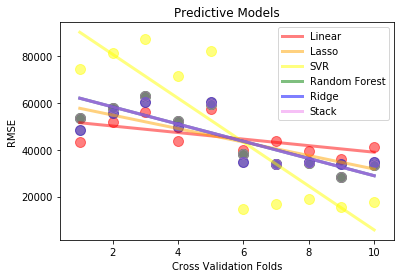

In [225]:
data_points1 =rmse_list_lr_all
data_points2 =rmse_lasso_ohe_dec
data_points3 =rmse_list_svr_dec
data_points4 =rmse_rf_dec
data_points5 =rmse_list_rr_dec
data_points6 =rmse_stack1

x_values = range(1, len(rmse_stack1_ohe)+1)

# solution
a, b = best_fit(x_values, data_points1)
c, d = best_fit(x_values, data_points2)
e, f = best_fit(x_values, data_points3)
g, h = best_fit(x_values, data_points4)
i, j = best_fit(x_values, data_points5)
k, l = best_fit(x_values, data_points6)


# plot points and fit line
plt.scatter(x_values, data_points1,color='red',s=100,alpha=.5)
yfit = [a + b * xi for xi in x_values]
line1, =plt.plot(x_values, yfit,linewidth = 3,color='red',alpha=.5, markerfacecolor='red', markersize=12, label='Linear')

plt.scatter(x_values, data_points2,color='orange',s=100,alpha=.5)
yfit2 = [c + d * xi for xi in x_values]
line2, =plt.plot(x_values, yfit2,linewidth = 3,color='orange',alpha=.5, markerfacecolor='orange', markersize=12, label='Lasso')

plt.scatter(x_values, data_points3,color='yellow',s=100,alpha=.5)
yfit3 = [e + f * xi for xi in x_values]
line3, =plt.plot(x_values, yfit3,linewidth = 3,color='yellow',alpha=.5, markerfacecolor='yellow', markersize=12, label='SVR')

plt.scatter(x_values, data_points4,color='green',s=100)
yfit4 = [g + h * xi for xi in x_values]
line4, =plt.plot(x_values, yfit4,linewidth = 3,color='green',alpha=.5, markerfacecolor='green', markersize=12, label='Random Forest')

plt.scatter(x_values, data_points5,color='blue',s=100,alpha=.5)
yfit5 = [i + j * xi for xi in x_values]
line5, =plt.plot(x_values, yfit4,linewidth = 3,color='blue',alpha=.5, markerfacecolor='blue', markersize=12, label='Ridge')

plt.scatter(x_values, data_points4,color='violet',s=100,alpha=.5)
yfit6 = [g + h * xi for xi in x_values]
line6, =plt.plot(x_values, yfit4,linewidth = 3,color='violet',alpha=.5, markerfacecolor='violet', markersize=12, label='Stack')


#line1, = plt.plot(x_values, data_points1,color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12, label='All Features - LE Only')
plt.legend(handles=[line1,line2,line3,line4,line5,line6])

# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('Predictive Models')
plt.show()

# Lasso, Ridge, and the Stack are the best predictive models.
Lasso and Ridge come from the same import (from sklearn import linear_model), so they might be very similar in the underlying implementation. The stack also has the same results since the meta_regressor for the stack is ridge.

Ultimatley we were able to get the RMSE smaller due to using a variety of different techniques such as Label encoding and One Hot Encoding. Altough it is still possible to better the results, I am happy with the results and hope to revist this problem in the future.

# RMSE = 44689.69